
# Lorenz 63 Model Code for Project \# 1

### Program to investigate concepts of tangent linear models, adjoint sensitivity, and singular vectors with the Lorenz 63 model
    

In [220]:
import numpy as np # NumPy for numerical computations
import matplotlib.pyplot as plt # Matplotlib for plotting
import pandas as pd
import seaborn as sns
from IPython.display import Image
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

This is a program to investigate concepts of tangent linear models, adjoint sensitivity, and singular vectors with the Lorenz 63 model.
   - Aneesh Subramanian, September 2023

   - Ryan Torn, August 2020,
   - using matlab code originally developed by Greg Hakim

In [117]:
## which Questions to Run
question_1 = False
question_2 = True
question_3 = False
question_4 = False
question_5 = False
question_6 = False

### Define the Lorenz 63 model equations

In [118]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    """
    Calculate the right-hand side of the Lorenz 63 model equations.

    Parameters:
    x, y, z : float
        The current state variables.
    s, r, b : float, optional
        The parameters for the Lorenz equations. Default values are s=10, r=28, b=2.667.

    Returns:
    dxdt, dydt, dzdt : float
        The rate of change of the state variables.
    """
    dxdt = s * (y - x)
    dydt = r * x - y - x * z
    dzdt = x * y - b * z
    return dxdt, dydt, dzdt

###  Compute the tangent linear model matrix for Lorenz 63 model by brute force based on input forecast trajectory

In [119]:
def lorenz_tlm(tvec, x, y, z, s=10, r=28, b=2.667):
    """
    Compute the tangent linear model (TLM) matrix for the Lorenz 63 system.
    Tangent linear model also sometimes called propogator matrix.

    This function calculates the TLM by integrating the linearized equations
    along a given trajectory.

    Parameters:
    tvec (array): Time vector for the trajectory
    x, y, z (arrays): State variables of the Lorenz system along the trajectory
    s, r, b (float): Lorenz system parameters (default: s=10, r=28, b=2.667)

    Returns:
    M (numpy.ndarray): The tangent linear model matrix

    The TLM is computed using the following steps:
    1. Initialize three basis vectors (v1, v2, v3)
    2. For each time step:
       a. Compute the instantaneous Jacobian matrix (tlm)
       b. Evolve each basis vector using the Jacobian
    3. Combine the final basis vectors to form the TLM matrix
    """
    # Initialize basis vectors
    v1 = np.array([1, 0, 0])
    v2 = np.array([0, 1, 0])
    v3 = np.array([0, 0, 1])

    for t in range(len(tvec) - 1):
        # Compute the instantaneous Jacobian matrix
        tlm = np.array([
            [-s,     s,      0],
            [(r - z[t]), -1., -x[t]],
            [y[t],   x[t],   -b]
        ])

        # Time step for this iteration
        dt = tvec[t + 1] - tvec[t]

        # Evolve each basis vector
        v1 = v1 + np.matmul(tlm, v1) * dt
        v2 = v2 + np.matmul(tlm, v2) * dt
        v3 = v3 + np.matmul(tlm, v3) * dt

    # Combine the evolved basis vectors to form the TLM matrix
    M = np.transpose([v1, v2, v3])

    return M

###  Compute the distance between two points in Lorenz 63 space based on Euclidean distance norm

In [120]:
def euclid_norm(x1, y1, z1, x2, y2, z2, verbose = False):
    if(verbose):
        print("x, y, z error: ", x2 - x1, y2 - y1, z2 - z1)

    err = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)
    return err

### Define model parameters (timestep, number of steps, forecast length...)

In [121]:
dt = 0.002  # time step of the model (do not need to change)
num_steps = 20000  # Number of time steps for full model trajectory

step1 = 1000  # model time step to initiate forecast from
fcst_len = 1.0  # forecast length in model timesteps
tl_freq = 1  # frequency of model timesteps to use in computing tangent linear model
sing_val = 1  # singular value plot/compute
ic_error = np.array([0.1, 0.1, 0.1])  # initial condition error to add to forecast ## identical in all directions initially
xf_sens = np.array([0., 0., 1.])  # metric to compute sensitivity in x, y, z space (0, 0, 1) means compute sensitivity of z forecast

plot3d = True  # True to plot forecast in 3D space
plotxz = True  # True to plot in x-z plane
plot_nlfcst = False  # True to plt non-linear forecast
plot_sv = True  # True to plot singular vectors
sv_plot_freq = 20  # Frequency of time steps to plot singular vectors

fcst_steps = int(fcst_len / dt)

###  Create arrays needed for calculations.  Need one more for the initial values

In [122]:
xtraj = np.empty(num_steps + 1) # Full x trajectory
ytraj = np.empty(num_steps + 1) # Full y trajectory
ztraj = np.empty(num_steps + 1) # Full z trajectory

### Set initial values for the full trajectory

In [123]:
xtraj[0], ytraj[0], ztraj[0] = (0., 1., 1.05)

Step through time, calculating the partial derivatives at the current point and using them to estimate the next point

In [124]:
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xtraj[i], ytraj[i], ztraj[i])
    xtraj[i + 1] = xtraj[i] + (x_dot * dt)
    ytraj[i + 1] = ytraj[i] + (y_dot * dt)
    ztraj[i + 1] = ztraj[i] + (z_dot * dt)


# Project 1 #


In [125]:
dt = 0.002  # time step of the model (do not need to change)
num_steps = 20000  # Number of time steps for full model trajectory

step1 = 1000  # model time step to initiate forecast from
fcst_len = 1.0  # forecast length in model timesteps
tl_freq = 1  # frequency of model timesteps to use in computing tangent linear model
sing_val = 1  # singular value plot/compute
ic_error = np.array([0.1, 0.1, 0.1])  # initial condition error to add to forecast ## identical in all directions initially
xf_sens = np.array([0., 0., 1.])  # metric to compute sensitivity in x, y, z space (0, 0, 1) means compute sensitivity of z forecast

plot3d = True  # True to plot forecast in 3D space
plotxz = True  # True to plot in x-z plane
plot_nlfcst = False  # True to plt non-linear forecast
plot_sv = True  # True to plot singular vectors
sv_plot_freq = 20  # Frequency of time steps to plot singular vectors

fcst_steps = int(fcst_len / dt)

In [126]:
## Functions do not currently allow for modification of tl_freq, they will eventually!
def find_xyz_truth(xtraj, ytraj, ztraj, init_step, fcst_steps):
    xtrue = xtraj[init_step:init_step+fcst_steps+1]
    ytrue = ytraj[init_step:init_step+fcst_steps+1]
    ztrue = ztraj[init_step:init_step+fcst_steps+1]
    return(xtrue, ytrue, ztrue)

def find_xyz_fcst(xtraj, ytraj, ztraj, init_step, fcst_steps, ic_error):
    xfcst = np.empty(fcst_steps + 1) # x forecast with initial condition error
    yfcst = np.empty(fcst_steps + 1) # y forecast with initial condition error
    zfcst = np.empty(fcst_steps + 1) # z forecast with initial condition error

    xfcst[0] = xtraj[init_step] + ic_error[0]
    yfcst[0] = ytraj[init_step] + ic_error[1]
    zfcst[0] = ztraj[init_step] + ic_error[2]
    
    for i in range(fcst_steps):
        x_dot, y_dot, z_dot = lorenz(xfcst[i], yfcst[i], zfcst[i])
        xfcst[i + 1] = xfcst[i] + (x_dot * dt)
        yfcst[i + 1] = yfcst[i] + (y_dot * dt)
        zfcst[i + 1] = zfcst[i] + (z_dot * dt)
    
    return (xfcst, yfcst, zfcst)

In [156]:
def find_error_for_windows(trajectories, fcst_len=1.0, window_freq=500, dt=0.002, ic_error=np.array([0.1, 0.1, 0.1]), tl_freq=1):
    """
    Takes in parameters for finding the TLM starting at a variety of time steps specified by window_freq
    
    Args:
        *trajectories<tuple>: (xtraj, ytraj, ztraj) (assumed to have 20000 steps)
        *fcst_len<int>: length of forecast window (which will determine number of steps per window w/ dt)
        *window_freq<int>: how often to take a new starting point
        *dt<float>: resolution of time with which to step through the forecast and TLM generation
        *ic_error<list>: [x_err, y_err, z_err] initial isostatic error to apply to the forecast
        *tl_freq<float>: period of time steps to calculate TLM with
    """

    xtraj, ytraj, ztraj = trajectories # extract trajectories
    
    fcst_steps = int(fcst_len / dt) # number of steps in a window based on dt
    
    ## Changing the window starting point 
    init_steps = np.arange(0,(20000-fcst_steps),window_freq, dtype = int) 
    # starting step for each iteration, windows of 500 and steps of 250 between them, 
    # so half and half overlap

    time_tlm = np.arange(0, (fcst_steps)*dt, dt) 
    error_compilation = [] ## will store all of the necessary info for each run as a tuple
    ## e.g. (initial_step, propogator_matrix, tlm_error_euclidian, nonlin_model_error)

    for step in init_steps:
        xtrue,ytrue,ztrue = find_xyz_truth(xtraj,ytraj,ztraj,step,fcst_steps)
        xfcst,yfcst,zfcst = find_xyz_fcst(xtraj,ytraj,ztraj,step,fcst_steps,ic_error)

        ## Propogator Matrix and Projected xyz error
        M = lorenz_tlm(time_tlm[::tl_freq], xtrue[:-1:tl_freq], ytrue[:-1:tl_freq], ztrue[:-1:tl_freq])
        tlm_error_xyz = np.matmul(M, ic_error) # propogating initial condition error forward

        ## Euclidian Error Calculations (total distance from true trajectory)
        tlm_error = euclid_norm(tlm_error_xyz[0], tlm_error_xyz[1], tlm_error_xyz[2], 0.0, 0.0, 0.0)
        fcst_error = euclid_norm(xfcst[-1], yfcst[-1], zfcst[-1], xtrue[-1], ytrue[-1], ztrue[-1])

        ## Final list of stuff to add to record
        ## Form of [initial_step,tlm_error_euclidian, nonlin_model_error, propogator_matrix]
        step_results = [step,tlm_error, fcst_error,M]
        error_compilation.append(step_results)
        
    return error_compilation

## Question \#1 ##

Run the model in the default configuration we have used in class. We will call this the control
trajectory of the model. For a variety of points along the control trajectory, compute the propagator
matrix (M) for a 1.0 time unit forecast (hereafter denoted tf ) using the code provided. At each
of these points, use the propagator matrix to predict the forecast error via the Euclidean norm for
different sized isotropic initial condition errors (i.e., change the magnitude of the error in variable
ic_error)). Next, compute the forecast error with the non-linear model by adding the isotropic
error to the control trajectory and integrating the nonlinear model forward. How does the linear
prediction of the forecast error compare to the actual error? Are there locations within the state
space volume where the linear model errors disagree with the nonlinear model? What does that
say about the Lorenz 63 model at these points?
----
General Approach:
* Initial step every 250 steps, still using a 500 step window for each TLM
* Extract errors for each window and compare visually/statistically 
* Vary isotropic error to test different pieces of the trajectory

In [128]:
if question_1:
    isotropic_range = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]#,1.5,2.0,2.5,5.0,7.5,10.0]
    error_difference = pd.DataFrame(columns = isotropic_range)
    TLM_error = pd.DataFrame(columns = isotropic_range)
    fcst_error = pd.DataFrame(columns = isotropic_range)

    for error in isotropic_range:
        ## Get error and TLM for given frequency across all possible windows
        window_result = find_error_for_windows(trajectories = (xtraj,ytraj,ztraj),window_freq=250, ic_error=np.array([error,error,error]))
        #TLM_comp = [[window[0], window[3]] for window in window_result]
        #error_comp = np.array([np.array([window[0], window[1], window[2], np.abs(window[1]-window[2])]) for window in window_result])

        error_difference[error] = np.array([np.abs(window[1]-window[2]) for window in window_result])
        fcst_error[error] = np.array([window[2] for window in window_result])
        TLM_error[error] = np.array([window[1] for window in window_result])


    initial_steps = [window[0] for window in window_result] # extracting step intervals
    
    error_difference.index = initial_steps
    error_difference.index.name = "Initial_Step"
    error_difference.columns.name = "Isotropic_Error_xyz"
    error_difference.data_information = "Absolute value of difference in error Between forecast and linear estimation"

    fcst_error.index = initial_steps
    fcst_error.index.name = "Initial_Step"
    fcst_error.columns.name = "Isotropic_Error_xyz"
    fcst_error.data_information = "Propogated forecast error starting at different time steps for a 500 step window."

    TLM_error.index = initial_steps
    TLM_error.index.name = "Initial_Step"
    TLM_error.columns.name = "Isotropic_Error_xyz"
    TLM_error.data_information = "Estimate error using a TLM for a 500 step window."

In [129]:
if question_1:
    plt.rcParams["figure.figsize"] = [10.0, 10]
    plt.rcParams["figure.autolayout"] = True

    fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2)

    sns.heatmap(fcst_error, ax = ax1)
    ax1.invert_yaxis()
    ax1.set_title("Propogated Forecast Error")

    sns.heatmap(TLM_error, ax = ax2)
    ax2.invert_yaxis()
    ax2.set_title("Linear Estimated Error")

    sns.heatmap(error_difference, ax = ax3)
    ax3.invert_yaxis()
    ax3.set_title("|Linear Model Error - Forecast Error|")

    sns.heatmap(error_difference, ax = ax4, robust = True, cmap="mako")
    ax4.invert_yaxis()
    ax4.set_title("Robust Quartiles of Difference for Visual")

    plt.setp(((ax1, ax2), (ax3,ax4)), xticks=ax2.get_xticks(), yticks=ax2.get_yticks(),xticklabels=ax2.get_xticklabels(), yticklabels=ax2.get_yticklabels())
    #plt.savefig("./Images_Project_1/q1_Heatmaps.png",format='png', dpi=150, bbox_inches='tight')
    print()

In [130]:
if question_1:
    ## Computing the Mean to Find the Largest Discrepancies
    error_difference['Mean_Difference'] = error_difference.mean(axis=1)
    non_linear_top = error_difference.sort_values(by=['Mean_Difference'], ascending=False).head(10)
    non_linear_top
    #print(non_linear_top.to_latex(formatters={"name": str.upper},float_format="{:.1f}".format))

### General Regions of Non-Linearity ###
In the last graph, the robust parameter is used in `sns.heatmap` to normalize some of the most extreme results. This lets us look more closely at the general differences between forecast error and the linear model error. We can see there are time steps (e.g. $t_i = 7250, 11750, 14250, 14500, 15500, 16500, 16750, \text{ and } 18000$), where the predicted error from the linear model significantly deviates from the forecasted error. 

In [131]:
if question_1:
    plt.rcParams["figure.figsize"] = [10,10]
    fig, (ax,ax1)= plt.subplots(1,2,subplot_kw={'projection': '3d'})
    #ax = fig.add_subplot(111, projection='3d')
    #ax1 = fig.add_subplot(121, projection = '3d')# Updated line

    ax.plot(xtraj, ytraj, ztraj, lw=0.5, color='lightgray')
    ax1.plot(xtraj, ytraj, ztraj, lw=0.5, color='lightgray')

    for i,coord in enumerate(list(non_linear_top.index.values)):
        ax.plot(xtraj[coord],ytraj[coord],ztraj[coord], color='red', marker='o', markersize = 3,alpha=1/((0.1*i+1)))
        ax1.plot(xtraj[coord],ytraj[coord],ztraj[coord], color='red', marker='o', markersize = 3,alpha=1/((0.23*i+1)))
        ax1.plot(xtraj[coord:coord+500],ytraj[coord:coord+500],ztraj[coord:coord+500],color = 'red',alpha=1/((i+1)))
    #ax.plot(xtrue, ytrue, ztrue, lw=0.5, color='red')
    #ax.plot(xfcst, yfcst, zfcst, lw = 0.5, color='blue')

    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("Top 100 Largest Error Differences, Initial Steps")
    ax1.set_xlabel("X Axis")
    ax1.set_ylabel("Y Axis")
    ax1.set_zlabel("Z Axis")
    ax1.set_title("Top 100 Largest Error Difference Windows")

    plt.savefig('./Images_Project_1/q1_lorenz3d_step25_double.png', format='png', dpi=150, bbox_inches='tight')
    plt.show()

In [132]:
if question_1:
    ## Computing the Mean along the isotropic error axis to Find the relation between forecast error and increasing perturbations
    error_difference.loc['Isotropic_Mean_Difference'] = error_difference.mean(axis=0)
    isotropic_pattern = error_difference.tail(1)
    plt.plot(isotropic_range, isotropic_pattern.loc['Isotropic_Mean_Difference'][:-1])
    plt.axhline(isotropic_pattern.loc['Isotropic_Mean_Difference'][-1], label = 'Total Mean Difference Across All Windows and Perturburations', linestyle = "--", color = 'orchid')
    plt.title("Mean Difference Between Forecast Error and Linear Model Error For Differing Isotropic Perturbations")
    plt.xlabel("Isotropic Error/Perturbation")
    plt.ylabel("Mean Difference in Errors")
    plt.legend()
    plt.savefig('./Images_Project_1/q1_mean_perturbation')

## Question 2 ##

In [133]:
dt = 0.002  # time step of the model (do not need to change)
num_steps = 20000  # Number of time steps for full model trajectory

step1 = 1000  # model time step to initiate forecast from
fcst_len = 1.0  # forecast length in model timesteps
tl_freq = 1  # frequency of model timesteps to use in computing tangent linear model
sing_val = 1  # singular value plot/compute
ic_error = np.array([0.1, 0.1, 0.1])  # initial condition error to add to forecast ## identical in all directions initially
xf_sens = np.array([0., 0., 1.])  # metric to compute sensitivity in x, y, z space (0, 0, 1) means compute sensitivity of z forecast

plot3d = True  # True to plot forecast in 3D space
plotxz = True  # True to plot in x-z plane
plot_nlfcst = False  # True to plt non-linear forecast
plot_sv = True  # True to plot singular vectors
sv_plot_freq = 20  # Frequency of time steps to plot singular vectors

fcst_steps = int(fcst_len / dt)

In [211]:
isotropic_range = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]#,1.5,2.0,2.5,5.0,7.5,10.0]
fcst_lengths = [0.1,0.2,0.3,0.4,0.5,0.75,1.0,2.5,5.0,10.0]
error_difference_list = []
fcst_error_list = []
TLM_error_list = []
#fcst_variation.index = fcst_lengths

for iter_fcst_len in fcst_lengths:
    #print(iter_fcst_len)
    error_difference = pd.DataFrame(columns = isotropic_range)
    TLM_error = pd.DataFrame(columns = isotropic_range)
    fcst_error = pd.DataFrame(columns = isotropic_range)
    for error in isotropic_range:
        ## Get error and TLM for given frequency across all possible windows
        window_result = find_error_for_windows(trajectories = (xtraj,ytraj,ztraj),fcst_len=iter_fcst_len,window_freq=250, ic_error=np.array([error,error,error]))
        #TLM_comp = [[window[0], window[3]] for window in window_result]
        #error_comp = np.array([np.array([window[0], window[1], window[2], np.abs(window[1]-window[2])]) for window in window_result])

        error_difference[error] = np.array([np.abs(window[1]-window[2]) for window in window_result])
        fcst_error[error] = np.array([window[2] for window in window_result])
        TLM_error[error] = np.array([window[1] for window in window_result])

    initial_steps = [window[0] for window in window_result] # extracting step intervals
    
    ## Computing the Mean to Find the Largest Discrepancies
    error_difference['Mean_Difference'] = error_difference.mean(axis=1)

    error_difference.index = initial_steps
    error_difference.index.name = "Initial_Step"
    error_difference.columns.name = "Isotropic_Error_xyz"

    fcst_error.index = initial_steps
    fcst_error.index.name = "Initial_Step"
    fcst_error.columns.name = "Isotropic_Error_xyz"
    
    TLM_error.index = initial_steps
    TLM_error.index.name = "Initial_Step"
    TLM_error.columns.name = "Isotropic_Error_xyz"

    
    error_difference_list.append(error_difference.assign(fcst_len=iter_fcst_len))
    fcst_error_list.append(fcst_error.assign(fcst_len=iter_fcst_len))
    TLM_error_list.append(TLM_error.assign(fcst_len=iter_fcst_len))

    
# Concatenate all DataFrames and set MultiIndex
error_difference_combined = pd.concat(error_difference_list).set_index('fcst_len', append=True)
fcst_error_combined = pd.concat(fcst_error_list).set_index('fcst_len', append=True)
TLM_error_combined = pd.concat(TLM_error_list).set_index('fcst_len', append=True)

error_fcst_var = error_difference_combined.swaplevel('Initial_Step','fcst_len')
error_fcst_var

Isotropic_Error_xyz    0.0          0.1          0.2           0.3  \
fcst_len Initial_Step                                                
0.1      0             0.0     0.009931     0.017750      0.023418   
         250           0.0     0.001518     0.003104      0.004744   
         500           0.0     0.000224     0.000095      0.000967   
         750           0.0     0.000400     0.000232      0.000516   
         1000          0.0     0.000599     0.000605      0.000008   
...                    ...          ...          ...           ...   
10.0     13750         0.0  3791.515794  7611.239620  11410.051423   
         14000         0.0   529.346930  1055.796059   1576.876807   
         14250         0.0  1787.808793  3569.747105   5381.137741   
         14500         0.0  2548.114807  5083.235212   7656.067360   
         14750         0.0  1911.355938  3824.954218   5741.784013   

Isotropic_Error_xyz             0.4           0.5           0.6           0.7  \
fcst_len Initial_Step                                                           
0.1      0                 0.026899      0.028158      0.027160      0.023871   
         250               0.006425      0.008136      0.009863      0.011594   
         500               0.002401      0.004405      0.006988      0.010160   
         750               0.001851      0.003785      0.006326      0.009483   
         1000              0.001204      0.003039      0.005509      0.008623   
...                             ...           ...           ...           ...   
10.0     13750         15234.671333  19064.798761  22874.404318  26666.294231   
         14000          2111.161829   2649.599524   3176.457470   3714.222748   
         14250          7179.695050   8985.815163  10785.787609  12593.945504   
         14500         10215.249541  12786.931866  15330.541725  17899.867891   
         14750          7659.738357   9573.456848  11491.807943  13417.814709   

Isotropic_Error_xyz             0.8           0.9           1.0  \
fcst_len Initial_Step                                             
0.1      0                 0.018256      0.010284      0.000079   
         250               0.013318      0.015020      0.016690   
         500               0.013928      0.018301      0.023288   
         750               0.013267      0.017687      0.022751   
         1000              0.012392      0.016826      0.021933   
...                             ...           ...           ...   
10.0     13750         30505.078247  34310.797282  38102.723149   
         14000          4242.018635   4783.775685   5308.195854   
         14250         14389.096478  16188.795169  17992.501457   
         14500         20459.977413  23032.047030  25609.962065   
         14750         15329.376736  17242.630878  19164.280857   

Isotropic_Error_xyz    Mean_Difference  
fcst_len Initial_Step                   
0.1      0                    0.016891  
         250                  0.008219  
         500                  0.007341  
         750                  0.006936  
         1000                 0.006431  
...                                ...  
10.0     13750            19051.961287  
         14000             2649.768322  
         14250             8986.757279  
         14500            12783.817719  
         14750             9577.927318  

[761 rows x 12 columns]

In [215]:
error_plot = (error_fcst_var.loc[10.0])[isotropic_range]
error_plot.max()

Isotropic_Error_xyz
0.0         0.000000
0.1     40629.892443
0.2     81284.146310
0.3    121948.744401
0.4    162588.181434
0.5    203239.654724
0.6    243889.911726
0.7    284546.036753
0.8    325205.844669
0.9    365847.750743
1.0    406505.208522
dtype: float64

0.1
0.2
0.3
0.4
0.5
0.75
1.0
2.5
5.0
10.0



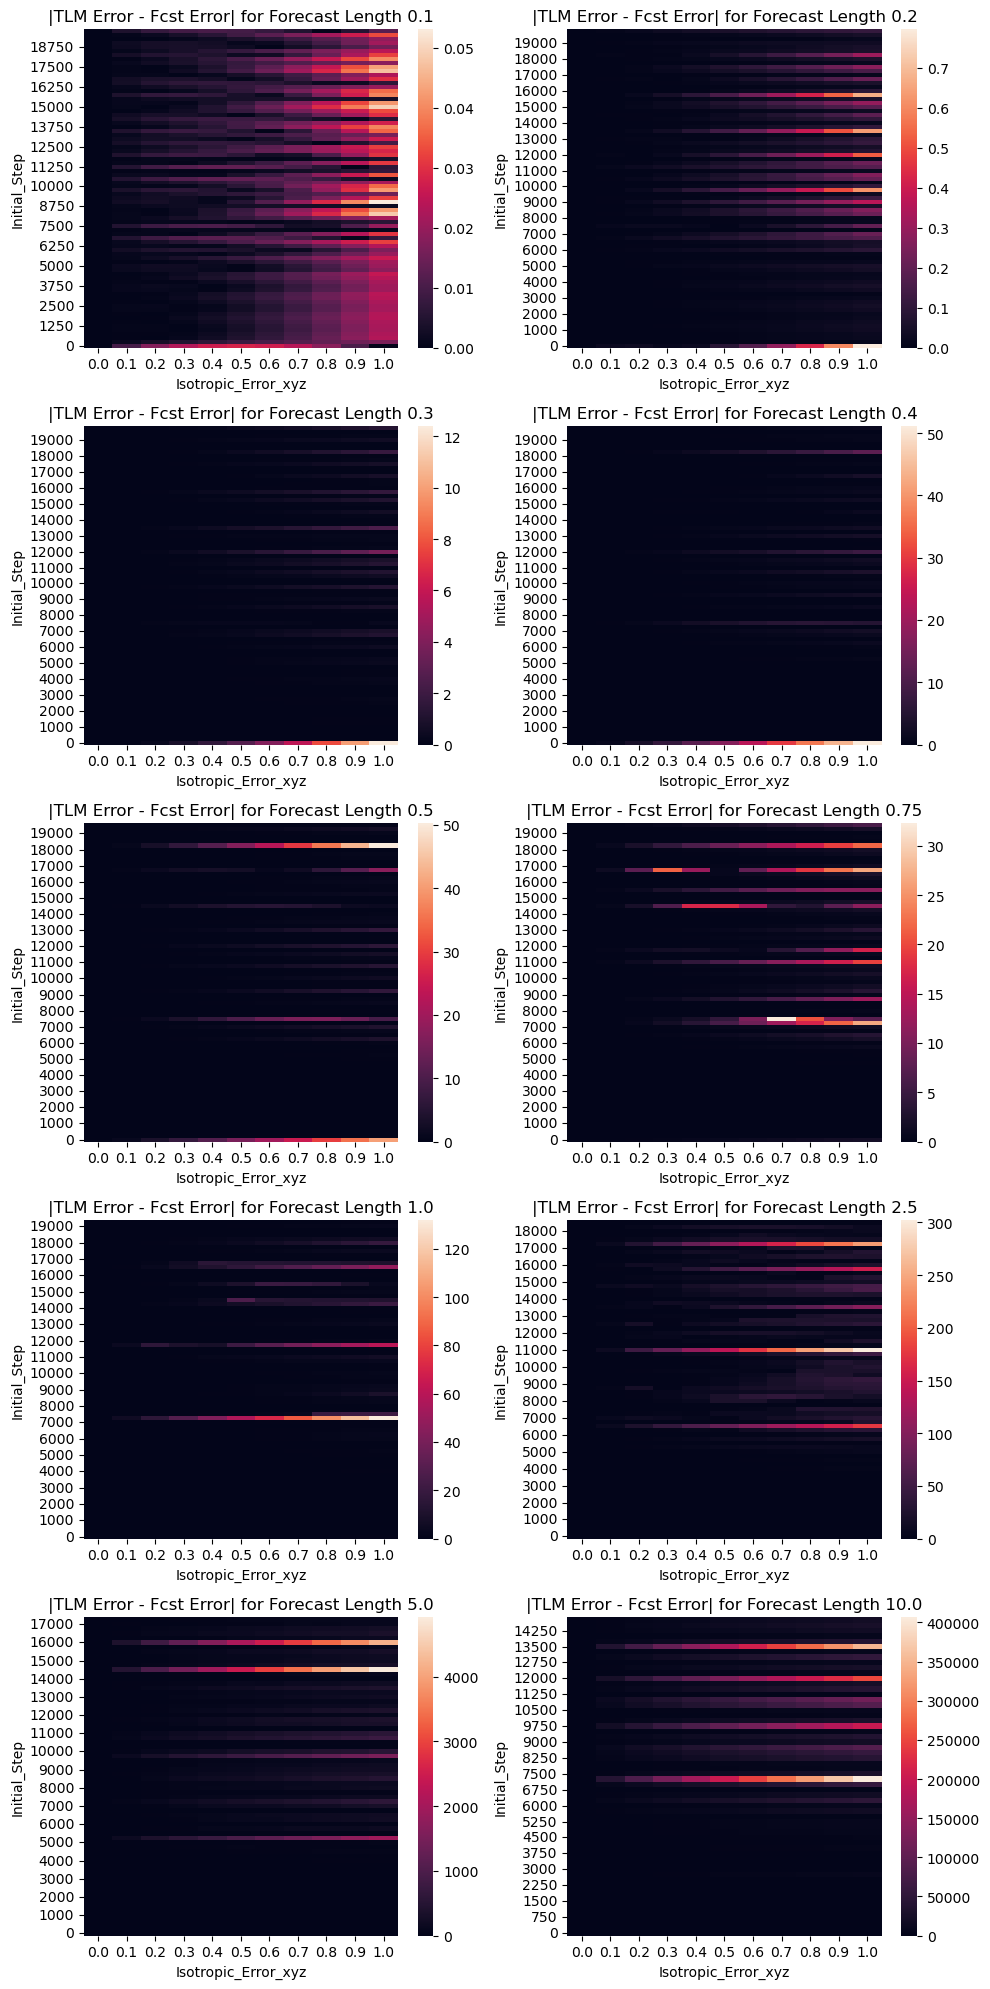

In [229]:
plt.rcParams["figure.figsize"] = [10.0, 20]
plt.rcParams["figure.autolayout"] = True
#plt.rcdefaults()
fcst_lengths = [0.1,0.2,0.3,0.4,0.5,0.75,1.0,2.5,5.0,10.0]

fig, axeses = plt.subplots(5,2)

counter = 0
for i, axes in enumerate(axeses):
    for j, ax in enumerate(axes):
        fcst_len = fcst_lengths[counter]
        print(fcst_len)
        error_plot = (error_fcst_var.loc[fcst_len])[isotropic_range]
    
        sns.heatmap(error_plot, ax = ax)
        ax.invert_yaxis()
        ax.set_title(f"|TLM Error - Fcst Error| for Forecast Length {fcst_len}")
        counter += 1




#plt.setp(((ax1, ax2), (ax3,ax4)), xticks=ax2.get_xticks(), yticks=ax2.get_yticks(),xticklabels=ax2.get_xticklabels(), yticklabels=ax2.get_yticklabels())
plt.savefig("./Images_Project_1/q2_Heatmaps.png",format='png', dpi=150, bbox_inches='tight')
print()

0.1
0.2
0.3
0.4
0.5
0.75
1.0
2.5
5.0
10.0



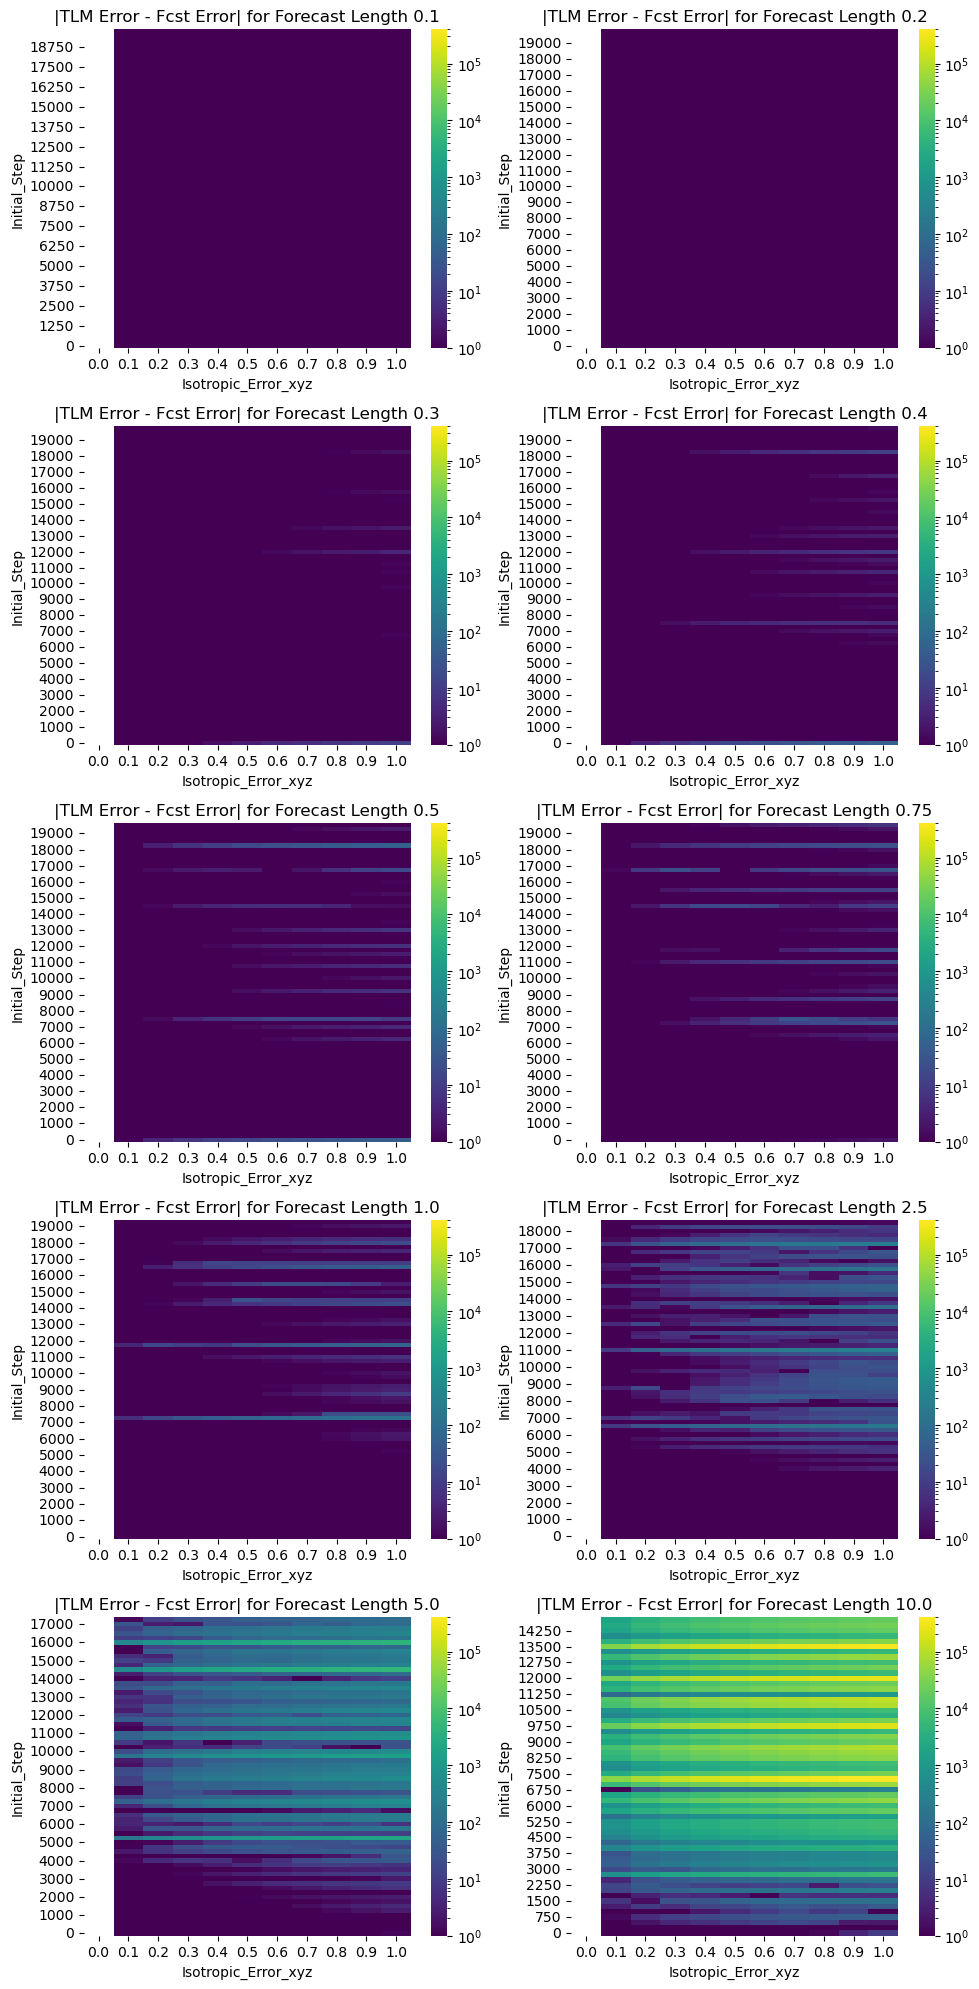

In [230]:
plt.rcParams["figure.figsize"] = [10.0, 20]
plt.rcParams["figure.autolayout"] = True
#plt.rcdefaults()
fcst_lengths = [0.1,0.2,0.3,0.4,0.5,0.75,1.0,2.5,5.0,10.0]

fig, axeses = plt.subplots(5,2)
vmin=1
vmax=400000 # found manually, bad habit I know!

counter = 0
for i, axes in enumerate(axeses):
    for j, ax in enumerate(axes):
        fcst_len = fcst_lengths[counter]
        print(fcst_len)
        error_plot = (error_fcst_var.loc[fcst_len])[isotropic_range]
    
        sns.heatmap(error_plot, ax = ax,norm=LogNorm(vmin = vmin, vmax = vmax), cmap = 'viridis')
        ax.invert_yaxis()
        ax.set_title(f"|TLM Error - Fcst Error| for Forecast Length {fcst_len}")
        counter += 1




#plt.setp(((ax1, ax2), (ax3,ax4)), xticks=ax2.get_xticks(), yticks=ax2.get_yticks(),xticklabels=ax2.get_xticklabels(), yticklabels=ax2.get_yticklabels())
plt.savefig("./Images_Project_1/q2_Normalize_Heatmaps.png",format='png', dpi=150, bbox_inches='tight')
print()

In [130]:

## Computing the Mean to Find the Largest Discrepancies
error_difference['Mean_Difference'] = error_difference.mean(axis=1)
non_linear_top = error_difference.sort_values(by=['Mean_Difference'], ascending=False).head(10)
non_linear_top
#print(non_linear_top.to_latex(formatters={"name": str.upper},float_format="{:.1f}".format))

In [131]:

plt.rcParams["figure.figsize"] = [10,10]
fig, (ax,ax1)= plt.subplots(1,2,subplot_kw={'projection': '3d'})
#ax = fig.add_subplot(111, projection='3d')
#ax1 = fig.add_subplot(121, projection = '3d')# Updated line

ax.plot(xtraj, ytraj, ztraj, lw=0.5, color='lightgray')
ax1.plot(xtraj, ytraj, ztraj, lw=0.5, color='lightgray')

for i,coord in enumerate(list(non_linear_top.index.values)):
    ax.plot(xtraj[coord],ytraj[coord],ztraj[coord], color='red', marker='o', markersize = 3,alpha=1/((0.1*i+1)))
    ax1.plot(xtraj[coord],ytraj[coord],ztraj[coord], color='red', marker='o', markersize = 3,alpha=1/((0.23*i+1)))
    ax1.plot(xtraj[coord:coord+500],ytraj[coord:coord+500],ztraj[coord:coord+500],color = 'red',alpha=1/((i+1)))
#ax.plot(xtrue, ytrue, ztrue, lw=0.5, color='red')
#ax.plot(xfcst, yfcst, zfcst, lw = 0.5, color='blue')

ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Top 100 Largest Error Differences, Initial Steps")
ax1.set_xlabel("X Axis")
ax1.set_ylabel("Y Axis")
ax1.set_zlabel("Z Axis")
ax1.set_title("Top 100 Largest Error Difference Windows")

plt.savefig('./Images_Project_1/q1_lorenz3d_step25_double.png', format='png', dpi=150, bbox_inches='tight')
plt.show()

In [132]:

## Computing the Mean along the isotropic error axis to Find the relation between forecast error and increasing perturbations
error_difference.loc['Isotropic_Mean_Difference'] = error_difference.mean(axis=0)
isotropic_pattern = error_difference.tail(1)
plt.plot(isotropic_range, isotropic_pattern.loc['Isotropic_Mean_Difference'][:-1])
plt.axhline(isotropic_pattern.loc['Isotropic_Mean_Difference'][-1], label = 'Total Mean Difference Across All Windows and Perturburations', linestyle = "--", color = 'orchid')
plt.title("Mean Difference Between Forecast Error and Linear Model Error For Differing Isotropic Perturbations")
plt.xlabel("Isotropic Error/Perturbation")
plt.ylabel("Mean Difference in Errors")
plt.legend()
plt.savefig('./Images_Project_1/q1_mean_perturbation')